In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os

In [2]:
all_files = [
    'results_160m/EleutherAI_pythia-160m_wikidata_athlete.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_gender.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_is_alive.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_occupation.json',
    'results_160m/EleutherAI_pythia-160m_wikidata_politics.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_athlete.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_gender.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_is_alive.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_occupation.json',
    'results_410m/EleutherAI_pythia-410m_wikidata_politics.json',
]

In [3]:
all_data = {}
for f in all_files:
    with open(f,'r') as file:
        all_data[f] = json.load(file)

In [4]:
all_data['results_160m/EleutherAI_pythia-160m_wikidata_athlete.json']

{'0': {'mse_pos': 0.042807377251456426,
  'mse_whole': 0.04086013007089496,
  'l0': 32.0,
  'l1': 55.252703437443365,
  'wikidata_athlete_is_football': {'model_sel': 0.06072509288787842,
   'sae_sel': 0.05981874465942383},
  'wikidata_athlete_is_basketball': {'model_sel': -0.0033232569694519043,
   'sae_sel': -0.005740165710449219},
  'wikidata_athlete_is_baseball': {'model_sel': 0.005135953426361084,
   'sae_sel': 0.009667634963989258},
  'wikidata_athlete_is_american_football': {'model_sel': 0.005438089370727539,
   'sae_sel': 0.009365558624267578},
  'wikidata_athlete_is_icehockey': {'model_sel': -0.0021147727966308594,
   'sae_sel': 0.0033233165740966797}},
 '1': {'mse_pos': 0.08338456076487655,
  'mse_whole': 0.07874832751303912,
  'l0': 32.0,
  'l1': 47.69153627741195,
  'wikidata_athlete_is_football': {'model_sel': 0.0459214448928833,
   'sae_sel': 0.06978851556777954},
  'wikidata_athlete_is_basketball': {'model_sel': -0.0009063482284545898,
   'sae_sel': 0.005438089370727539},

In [8]:
all_datasets = []
for dataset_name in list(all_data.keys()):
    organized_data = []
    name1 = dataset_name.split('/')[-1]
    all_vals = name1.split('_')
    model_name = all_vals[1]
    data_name = '_'.join(all_vals[2:])[:-5]
    for layer in all_data[dataset_name].keys():
        data = all_data[dataset_name][layer]
        for attribute in list(data.keys()):
            if isinstance(data[attribute], dict):
                all_datasets.append(
                    {
                        'feature': attribute,
                        'layer': int(layer),
                        'model': model_name,
                        'dataset': data_name,
                        'model_sel': data[attribute]['model_sel'],
                        'sae_sel': data[attribute]['sae_sel'],
                        'mse_pos': data['mse_pos'],
                        'mse_whole': data['mse_whole'],
                        'l0': data['l0'],
                        'l1': data['l1']
                    }
                )

all_datasets = pd.DataFrame(all_datasets)

In [11]:
14 * 36

504

In [13]:
all_datasets.head(20)

,feature,layer,model,dataset,model_sel,sae_sel,mse_pos,mse_whole,l0,l1
0,wikidata_athlete_is_football,0,pythia-160m,wikidata_athlete,0.060725,0.059819,0.042807,0.040860,32.0,55.252703
1,wikidata_athlete_is_basketball,0,pythia-160m,wikidata_athlete,-0.003323,-0.005740,0.042807,0.040860,32.0,55.252703
2,wikidata_athlete_is_baseball,0,pythia-160m,wikidata_athlete,0.005136,0.009668,0.042807,0.040860,32.0,55.252703
3,wikidata_athlete_is_american_football,0,pythia-160m,wikidata_athlete,0.005438,0.009366,0.042807,0.040860,32.0,55.252703
4,wikidata_athlete_is_icehockey,0,pythia-160m,wikidata_athlete,-0.002115,0.003323,0.042807,0.040860,32.0,55.252703
5,wikidata_athlete_is_football,1,pythia-160m,wikidata_athlete,0.045921,0.069789,0.083385,0.078748,32.0,47.691536
6,wikidata_athlete_is_basketball,1,pythia-160m,wikidata_athlete,-0.000906,0.005438,0.083385,0.078748,32.0,47.691536
7,wikidata_athlete_is_baseball,1,pythia-160m,wikidata_athlete,0.006647,0.018429,0.083385,0.078748,32.0,47.691536
8,wikidata_athlete_is_american_football,1,pythia-160m,wikidata_athlete,0.004532,0.009668,0.083385,0.078748,32.0,47.691536
9,wikidata_athlete_is_icehockey,1,pythia-160m,wikidata_athlete,0.000906,0.012689,0.083385,0.078748,32.0,47.691536


In [14]:
all_datasets['delta_sel'] = all_datasets['sae_sel'] - all_datasets['model_sel']

In [15]:
all_datasets['delta_sel'].corr(all_datasets['mse_pos'])

0.048797449678470314

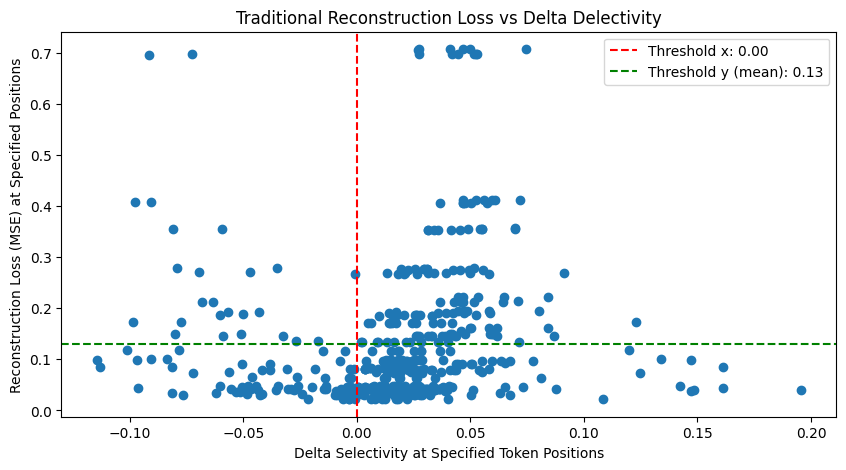

In [21]:
no_outliers = all_datasets[all_datasets['mse_pos'] < 2]
plt.figure(figsize=(10,5))
plt.scatter(no_outliers['delta_sel'], no_outliers['mse_pos'])

mean_x = 0
mean_y = np.mean(no_outliers['mse_pos'])

# Add a vertical line at the mean of x
plt.axvline(x=mean_x, color='red', linestyle='--', label=f'Threshold x: {mean_x:.2f}')

# Add a horizontal line at the mean of y
plt.axhline(y=mean_y, color='green', linestyle='--', label=f'Threshold y (mean): {mean_y:.2f}')

# Add axis labels and title
plt.xlabel('Delta Selectivity at Specified Token Positions')
plt.ylabel('Reconstruction Loss (MSE) at Specified Positions')
plt.title('Traditional Reconstruction Loss vs Delta Delectivity')
plt.legend()

plt.show()

In [14]:
all_datasets = {}
for dataset_name in list(all_data.keys()):
    organized_data = []
    name1 = dataset_name.split('/')[-1]
    all_vals = name1.split('_')
    model_name = all_vals[1]
    data_name = '_'.join(all_vals[2:])[:-5]
    for layer in all_data[dataset_name].keys():
        data = all_data[dataset_name][layer]
        data['layer'] = int(layer)
        data['model'] = model_name
        data['dataset'] = data_name
        for attribute in list(data.keys()):
            if isinstance(data[attribute], dict):
                data[f"model_sel"] = data[attribute]['model_sel']
                data[f"sae_sel"] = data[attribute]['sae_sel']
                del data[attribute]
        organized_data.append(data)
    all_datasets[dataset_name] = pd.DataFrame(organized_data)

In [15]:
all_datasets['results_410m/EleutherAI_pythia-410m_wikidata_athlete.json'].head()

,mse_pos,mse_whole,l0,l1,layer,wikidata_athlete_is_football_model_sel,wikidata_athlete_is_football_sae_sel,wikidata_athlete_is_basketball_model_sel,wikidata_athlete_is_basketball_sae_sel,wikidata_athlete_is_baseball_model_sel,wikidata_athlete_is_baseball_sae_sel,wikidata_athlete_is_american_football_model_sel,wikidata_athlete_is_american_football_sae_sel,wikidata_athlete_is_icehockey_model_sel,wikidata_athlete_is_icehockey_sae_sel,model,dataset
0,0.081940,0.081916,31.456473,75.315018,0,-0.005740,0.023867,-0.000604,0.003021,-0.000604,0.013293,-0.009970,0.007855,0.005136,0.008761,pythia-410m,wikidata_athlete
1,0.021877,0.021363,32.000000,13.152352,1,0.064955,0.105136,-0.002417,-0.003323,-0.002719,0.003323,-0.007251,0.000604,-0.001208,0.009970,pythia-410m,wikidata_athlete
2,0.040791,0.033289,32.000000,20.730849,2,0.030211,0.081571,-0.000604,0.007855,-0.006042,0.011178,0.005438,0.017523,-0.002115,0.011178,pythia-410m,wikidata_athlete
3,0.040466,0.030719,32.000000,22.531573,3,0.056193,0.095770,-0.002719,0.003928,0.000906,0.011178,-0.006647,0.017221,-0.009063,0.019033,pythia-410m,wikidata_athlete
4,0.040197,0.032441,32.000000,22.803721,4,0.093656,0.128097,-0.007251,0.009063,0.015408,0.048338,0.025982,0.039275,0.004230,0.032930,pythia-410m,wikidata_athlete


In [12]:
a = {1:2, 3:5}

In [13]:
a.clone()

AttributeError: 'dict' object has no attribute 'clone'